In [64]:
import urllib

In [65]:
# https://en.wikipedia.org/wiki/Rajgad_Fort
url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')

In [66]:
url

In [67]:
data = url.read()
print(data)

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Rajgad Fort - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinn

In [68]:
data = data.decode('utf-8')

In [69]:
start = data.find('<title>')
start

666

In [70]:
end = data.find('</title>')
end

696

In [71]:
data[start+7:end]

'Rajgad Fort - Wikipedia'

In [72]:
data.count("<img")

29

In [73]:
import re

In [74]:
len(re.findall('<img.*?', data))

29

In [75]:
pattern = "<title.*?>.*?</title.*?>"
match_result = re.search(pattern, data, re.IGNORECASE)
title = match_result.group()
title = re.sub("<.*?>", "", title) # Remove HTML tags

print(title)

Rajgad Fort - Wikipedia


In [76]:
from bs4 import BeautifulSoup

In [77]:
soup = BeautifulSoup(data, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Rajgad Fort - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-di

In [78]:
import string
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
import matplotlib.pyplot as plt

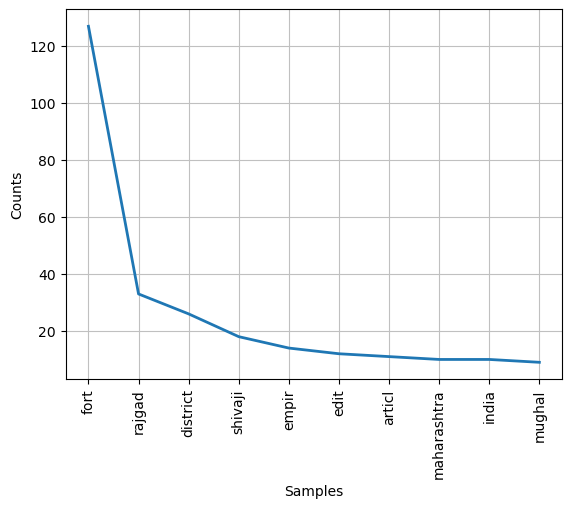

[('fort', 127), ('rajgad', 33), ('district', 26)]

In [79]:
url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')

data = url.read()

soup = BeautifulSoup(data, 'html.parser')
text = soup.get_text(separator=" ",strip=True)

clean = []
for word in word_tokenize(text) :
    if word not in string.punctuation and word not in "``''·":
        clean.append(word)

swords = stopwords.words('english')
txt_without_stpwords = []
for word in clean :
    if word.lower() not in swords:
        txt_without_stpwords.append(word)
     
words = [] 
ps = PorterStemmer()
for word in txt_without_stpwords:
    words.append(ps.stem(word))
    
words = ' '.join(words)   

freq = FreqDist(word_tokenize(words.lower()))
freq.plot(10, cumulative=False)
freq.most_common(3)

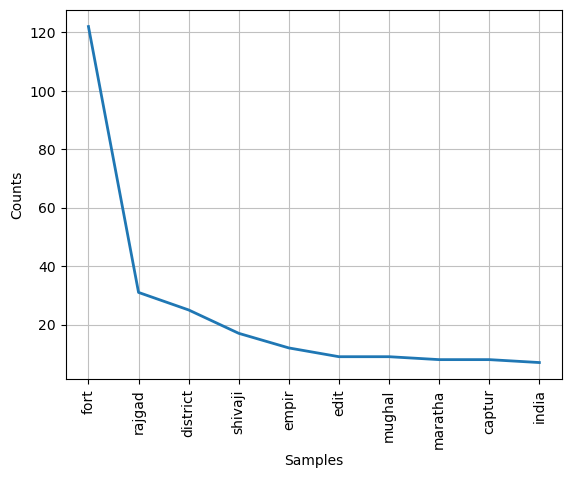

[('fort', 122), ('rajgad', 31), ('district', 25)]

In [80]:
url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')
data = url.read()

ps = PorterStemmer()

soup = BeautifulSoup(data, 'html.parser')
text = soup.get_text()

tokens = word_tokenize(text)
swords = stopwords.words('english')

tokens1 = [x.lower() for x in tokens if x.isalpha() or x.isdigit()]
tokens2 = [ps.stem(x) for x in tokens1 if x not in swords]

freq = FreqDist(tokens2)
freq.plot(10)
freq.most_common(3)

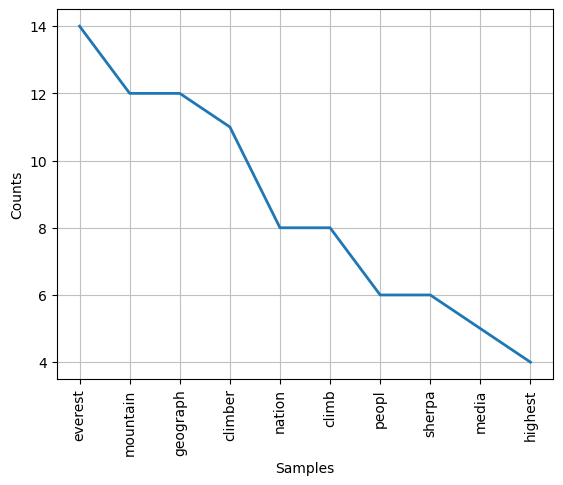

[('everest', 14), ('mountain', 12), ('geograph', 12)]

In [81]:
url = urllib.request.urlopen('https://education.nationalgeographic.org/resource/mount-everest/')
data = url.read()

ps = PorterStemmer()

soup = BeautifulSoup(data, 'html.parser')
text = soup.get_text()

tokens = word_tokenize(text)
swords = stopwords.words('english')

tokens1 = [x.lower() for x in tokens if x.isalpha() or x.isdigit()]
tokens2 = [ps.stem(x) for x in tokens1 if x not in swords]

freq = FreqDist(tokens2)
freq.plot(10)
freq.most_common(3)

In [82]:
# pip install pygooglenews   #requiers python 3.8

In [83]:
from pygooglenews import GoogleNews

In [84]:
gn = GoogleNews()
s = gn.search("Cricket Worldcup")

for entry in s['entries']:
  print(entry['title'])
  print('---------------------------')

Schedule confirmed for U19 Men's Cricket World Cup - ICC Cricket
---------------------------
Rohit Sharma's "Opportunity To Make Up For World Cup Loss": Sunil Gavaskar On South Africa Tests - NDTV Sports
---------------------------
England tour of India: Four spinners, including Tom Hartley and Shoaib Bashir, named in visiting team’s side - The Indian Express
---------------------------
Men's Under-19 World Cup to run from January 19 to February 11 in South Africa - ESPNcricinfo
---------------------------
From Palestine to Cricket World Cup: What UAE residents Googled in 2023 - Khaleej Times
---------------------------
COMMENTARY: So Dominica loses ICC World Cup matches. Who cares? - Dominica News Online
---------------------------
Strong squad to fly flag for Australia at U19 World Cup | cricket.com.au - cricket.com.au
---------------------------
Cricket, ICC Women's T20 World Cup 2024: These teams have qualified - complete list - Olympics
---------------------------
'How many people

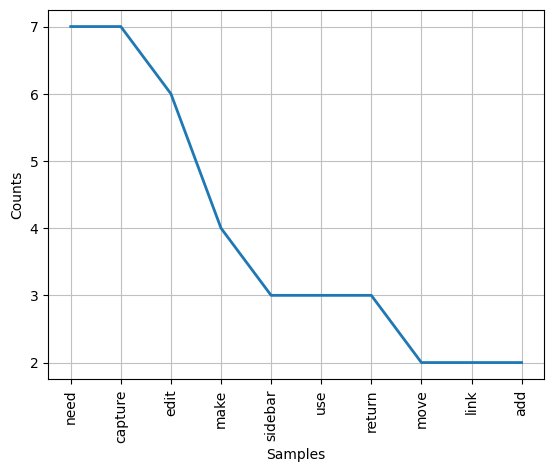

[('need', 7), ('capture', 7), ('edit', 6)]

In [89]:
url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')
data = url.read()

wnl = WordNetLemmatizer()

soup = BeautifulSoup(data, 'html.parser')
text = soup.get_text()

tokens = word_tokenize(text)
swords = stopwords.words('english')

tokens1 = [x for x in tokens if x.isalpha()]

tags = pos_tag(tokens1)
verbs = []
for t in tags:
    if t[1].startswith('V') :
      verbs.append(t)

tokens3 = []
for word, _ in verbs:
    if word not in swords:
        tokens3.append(wnl.lemmatize(word.lower(), pos = 'v'))

freq = FreqDist(tokens3)
freq.plot(10)
freq.most_common(3)

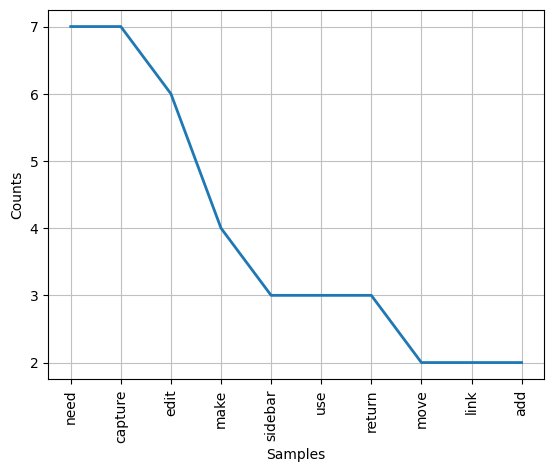

[('need', 7), ('capture', 7), ('edit', 6)]

In [90]:
url = urllib.request.urlopen('https://en.wikipedia.org/wiki/Rajgad_Fort')
data = url.read()

wnl = WordNetLemmatizer()

soup = BeautifulSoup(data, 'html.parser')
text = soup.get_text()

tokens = word_tokenize(text)
swords = stopwords.words('english')

tokens1 = [x for x in tokens if x.isalpha()]
tags = pos_tag(tokens1)
tokens2 = [word[0].lower() for word in tags if word[1].startswith('V')]
      
tokens3 = [wnl.lemmatize(x,'v') for x in tokens2 if x not in swords]

freq = FreqDist(tokens3)
freq.plot(10)
freq.most_common(3)